In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Jupyter / Colab용 옵션
pd.set_option("display.max_columns", 100)

# ===== 파일 경로 설정 (네 환경에 맞게 수정) =====
CSV_PATH = "/content/drive/MyDrive/Colab Notebooks/cohort_ver47_with_cci_hfrs.csv"

df = pd.read_csv(CSV_PATH)
df.shape, df.columns


((1930, 37),
 Index(['subject_id', 'hadm_id', 'icu_stay_id', 'icu_intime', 'icu_outtime',
        'gender', 'race', 'arrival_transport', 'disposition', 'admittime',
        'death_flag', 'icu_los', 'icu_los.1', 'dod', 'first_troponin_charttime',
        'troponin_end_charttime', 'first_troponin_positive_charttime',
        'troponin_count', 'first_ecg_charttime', 'ecg_count',
        'first_stemi_ecg_time', 'ecg_stemi_count', 'ed_intime', 'ed_outtime',
        'ed_los', 'ed_stay_id', 'pci_code', 'pci_starttime', 'pci_endtime',
        'first_antithrombotic_charttime', 'dischtime', 'age', 'cci_score',
        'cci_category', 'stay_id', 'hfrs_score', 'hfrs_category'],
       dtype='object'))

In [ ]:
cols = ["cci_score", "cci_category", "hfrs_score", "hfrs_category"]
df_ccihfrs = df[cols].copy()

df_ccihfrs.head()


,cci_score,cci_category,hfrs_score,hfrs_category
0,1,1_2,7.1,5_15
1,1,1_2,3.8,lt5
2,1,1_2,4.5,lt5
3,4,3_plus,10.3,5_15
4,1,1_2,1.4,lt5


In [ ]:
# 결측치 개수
df_ccihfrs.isna().sum()


,0
cci_score,0
cci_category,0
hfrs_score,0
hfrs_category,0


In [ ]:
# 수치형(cci_score, hfrs_score) 기초 통계
df_ccihfrs[["cci_score", "hfrs_score"]].describe()


,cci_score,hfrs_score
count,1930.000000,1930.000000
mean,0.489119,2.224611
std,1.199246,4.430885
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,2.400000
max,10.000000,35.100000


In [ ]:
# 범주형(cci_category, hfrs_category) 분포
print("cci_category 분포:")
print(df_ccihfrs["cci_category"].value_counts(dropna=False), "\n")

print("hfrs_category 분포:")
print(df_ccihfrs["hfrs_category"].value_counts(dropna=False))


cci_category 분포:
cci_category
0         1378
1_2        458
3_plus      94
Name: count, dtype: int64 

hfrs_category 분포:
hfrs_category
lt5     1598
5_15     278
gt15      54
Name: count, dtype: int64


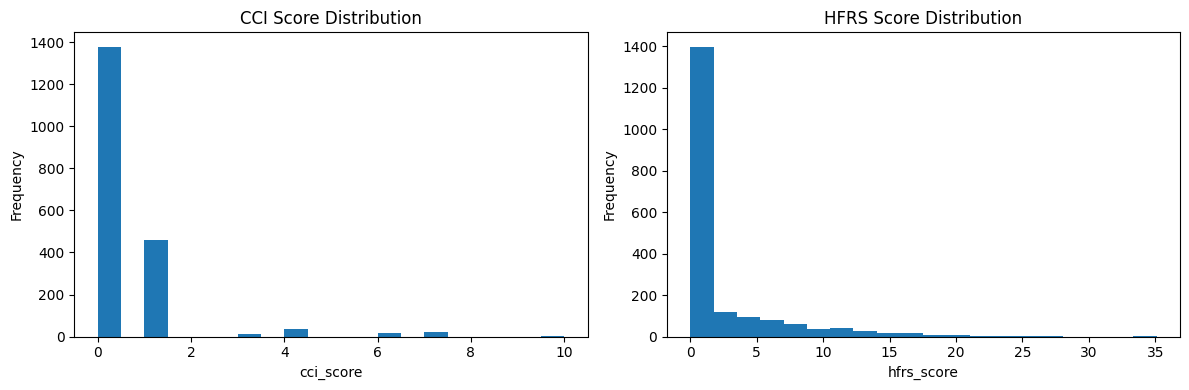

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
df_ccihfrs["cci_score"].plot(kind="hist", bins=20)
plt.title("CCI Score Distribution")
plt.xlabel("cci_score")

plt.subplot(1,2,2)
df_ccihfrs["hfrs_score"].plot(kind="hist", bins=20)
plt.title("HFRS Score Distribution")
plt.xlabel("hfrs_score")

plt.tight_layout()
plt.show()


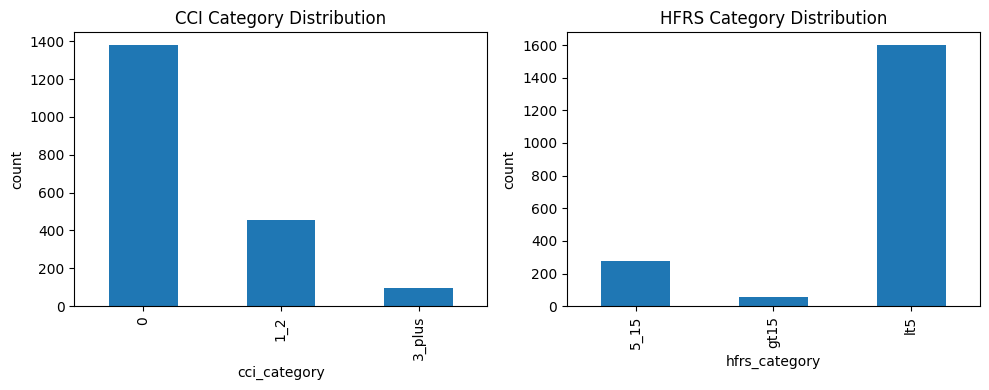

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
df_ccihfrs["cci_category"].value_counts().sort_index().plot(kind="bar")
plt.title("CCI Category Distribution")
plt.xlabel("cci_category")
plt.ylabel("count")

plt.subplot(1,2,2)
df_ccihfrs["hfrs_category"].value_counts().sort_index().plot(kind="bar")
plt.title("HFRS Category Distribution")
plt.xlabel("hfrs_category")
plt.ylabel("count")

plt.tight_layout()
plt.show()


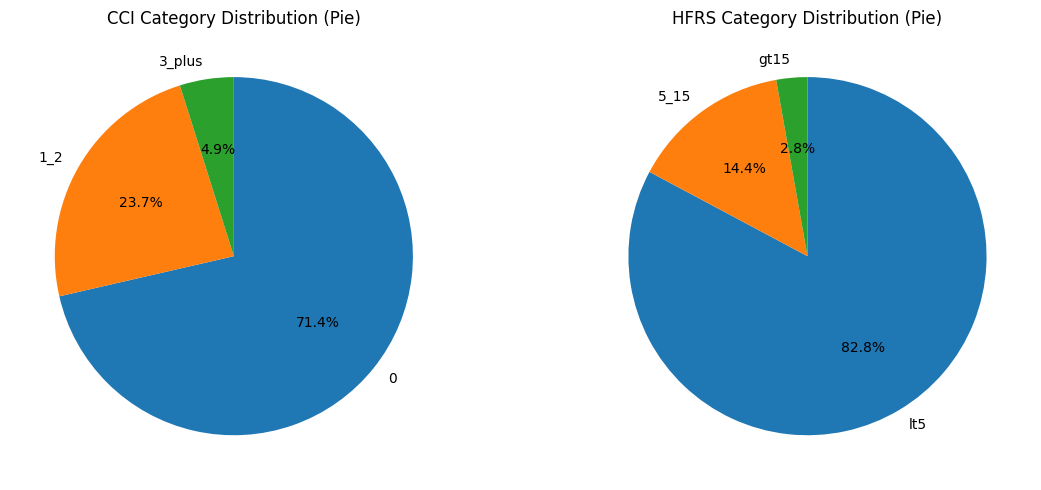

In [ ]:
import matplotlib.pyplot as plt

# --- CCI Category Pie Chart ---
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
df_ccihfrs["cci_category"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False
)
plt.title("CCI Category Distribution (Pie)")
plt.ylabel("")


# --- HFRS Category Pie Chart ---
plt.subplot(1,2,2)
df_ccihfrs["hfrs_category"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False
)
plt.title("HFRS Category Distribution (Pie)")
plt.ylabel("")

plt.tight_layout()
plt.show()


In [ ]:
# 단순 상관계수
df_ccihfrs[["cci_score", "hfrs_score"]].corr()


,cci_score,hfrs_score
cci_score,1.000000,0.431551
hfrs_score,0.431551,1.000000


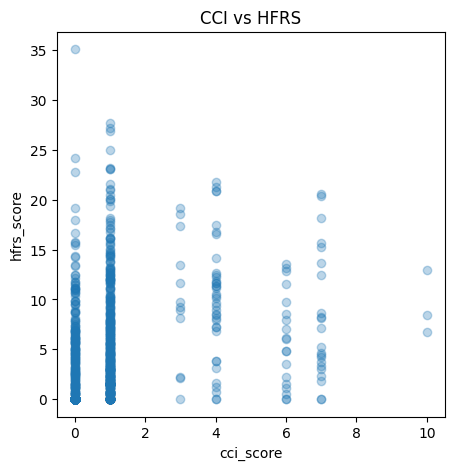

In [ ]:
# 산점도
plt.figure(figsize=(5,5))
plt.scatter(df_ccihfrs["cci_score"], df_ccihfrs["hfrs_score"], alpha=0.3)
plt.xlabel("cci_score")
plt.ylabel("hfrs_score")
plt.title("CCI vs HFRS")
plt.show()


In [ ]:
# 교차표 (빈도)
ct = pd.crosstab(df_ccihfrs["cci_category"], df_ccihfrs["hfrs_category"])
ct


hfrs_category,5_15,gt15,lt5
cci_category,,,
0,81,9,1288
1_2,148,30,280
3_plus,49,15,30


In [ ]:
# 행 기준 비율 (%)
ct_row_pct = ct.div(ct.sum(axis=1), axis=0).round(3)
ct_row_pct


hfrs_category,5_15,gt15,lt5
cci_category,,,
0,0.059,0.007,0.935
1_2,0.323,0.066,0.611
3_plus,0.521,0.160,0.319


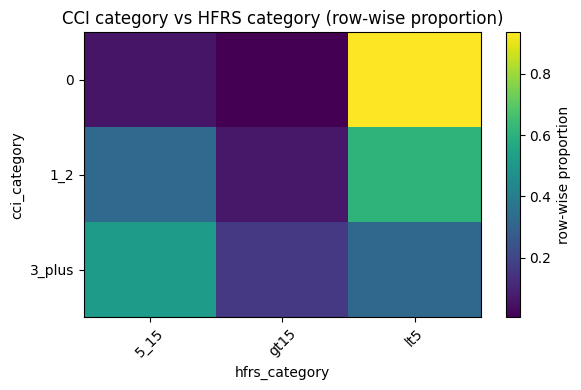

In [ ]:
# 간단한 heatmap 스타일 시각화 (matplotlib만 사용)
plt.figure(figsize=(6,4))
plt.imshow(ct_row_pct, aspect="auto")
plt.colorbar(label="row-wise proportion")

plt.xticks(ticks=np.arange(ct_row_pct.shape[1]), labels=ct_row_pct.columns, rotation=45)
plt.yticks(ticks=np.arange(ct_row_pct.shape[0]), labels=ct_row_pct.index)
plt.title("CCI category vs HFRS category (row-wise proportion)")
plt.xlabel("hfrs_category")
plt.ylabel("cci_category")

plt.tight_layout()
plt.show()


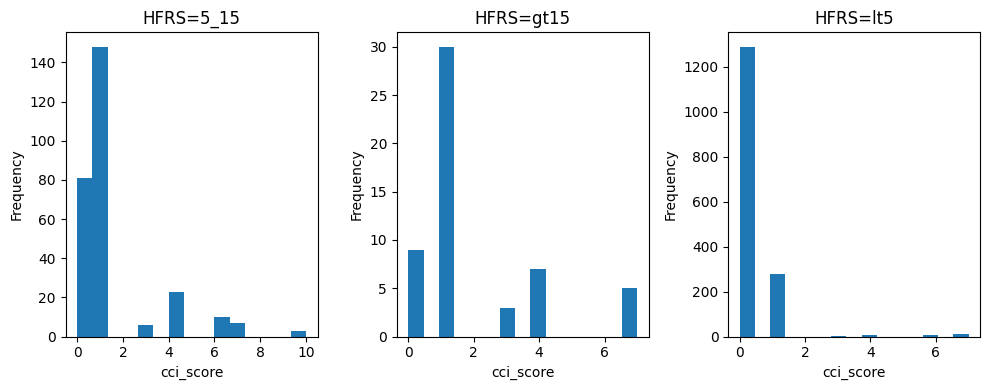

In [ ]:
plt.figure(figsize=(10,4))

for i, cat in enumerate(sorted(df_ccihfrs["hfrs_category"].dropna().unique())):
    plt.subplot(1, len(df_ccihfrs["hfrs_category"].dropna().unique()), i+1)
    df_ccihfrs.loc[df_ccihfrs["hfrs_category"] == cat, "cci_score"].plot(kind="hist", bins=15)
    plt.title(f"HFRS={cat}")
    plt.xlabel("cci_score")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ====== 1. CSV 로드 ======
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cohort_ver47_with_cci_hfrs.csv")

# ====== 2. 사용할 주요 컬럼만 확인 ======
cols = ["death_flag", "icu_los", "ed_los",
        "cci_score", "cci_category",
        "hfrs_score", "hfrs_category"]
df[cols].head()


,death_flag,icu_los,ed_los,cci_score,cci_category,hfrs_score,hfrs_category
0,1.0,1.232326,2.483333,1,1_2,7.1,5_15
1,0.0,0.746007,2.400000,1,1_2,3.8,lt5
2,1.0,6.296898,5.377500,1,1_2,4.5,lt5
3,1.0,6.820000,8.116667,4,3_plus,10.3,5_15
4,1.0,2.750000,4.293611,1,1_2,1.4,lt5


In [ ]:
corr = df[["cci_score", "hfrs_score", "icu_los", "ed_los", "death_flag"]].corr()
corr


,cci_score,hfrs_score,icu_los,ed_los,death_flag
cci_score,1.000000,0.431551,0.015152,0.038957,0.185887
hfrs_score,0.431551,1.000000,0.180970,0.107780,0.262661
icu_los,0.015152,0.180970,1.000000,-0.013935,0.112633
ed_los,0.038957,0.107780,-0.013935,1.000000,0.110879
death_flag,0.185887,0.262661,0.112633,0.110879,1.000000


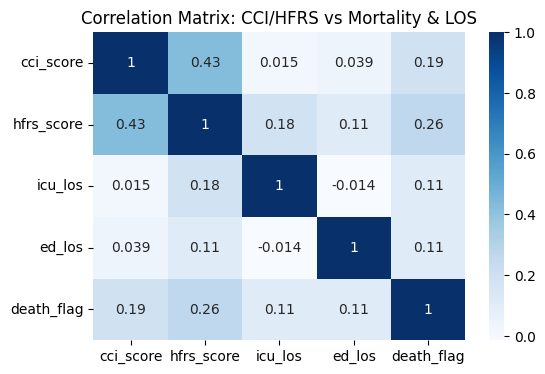

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Matrix: CCI/HFRS vs Mortality & LOS")
plt.show()


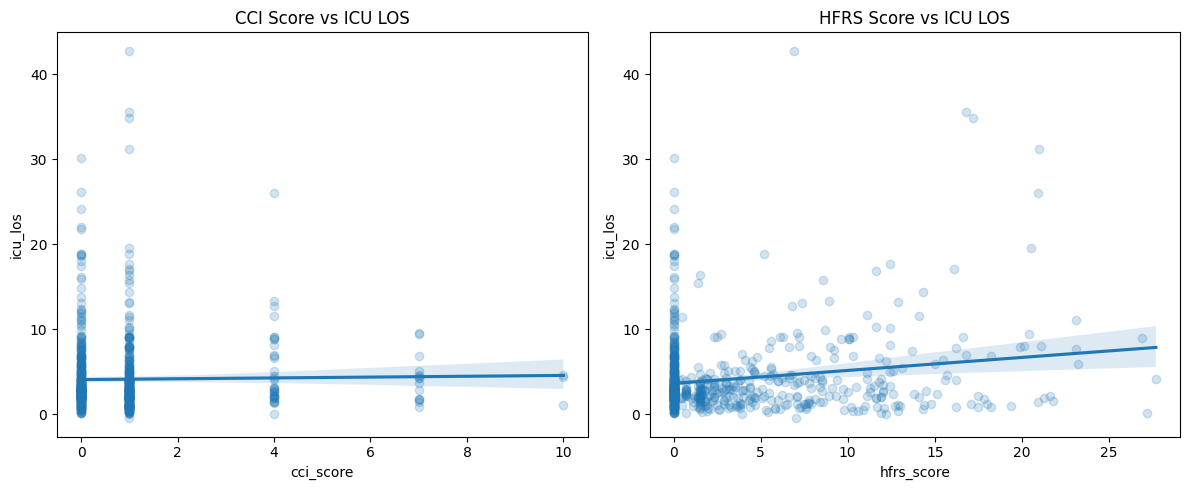

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.regplot(x="cci_score", y="icu_los", data=df, scatter_kws={'alpha':0.2})
plt.title("CCI Score vs ICU LOS")

plt.subplot(1,2,2)
sns.regplot(x="hfrs_score", y="icu_los", data=df, scatter_kws={'alpha':0.2})
plt.title("HFRS Score vs ICU LOS")

plt.tight_layout()
plt.show()


In [ ]:
cci_mortality = df.groupby("cci_category")["death_flag"].mean()
hfrs_mortality = df.groupby("hfrs_category")["death_flag"].mean()

print("CCI category mortality:\n", cci_mortality)
print("\nHFRS category mortality:\n", hfrs_mortality)


CCI category mortality:
 cci_category
0         0.364829
1_2       0.286432
3_plus    0.771930
Name: death_flag, dtype: float64

HFRS category mortality:
 hfrs_category
5_15    0.608974
gt15    0.666667
lt5     0.274571
Name: death_flag, dtype: float64


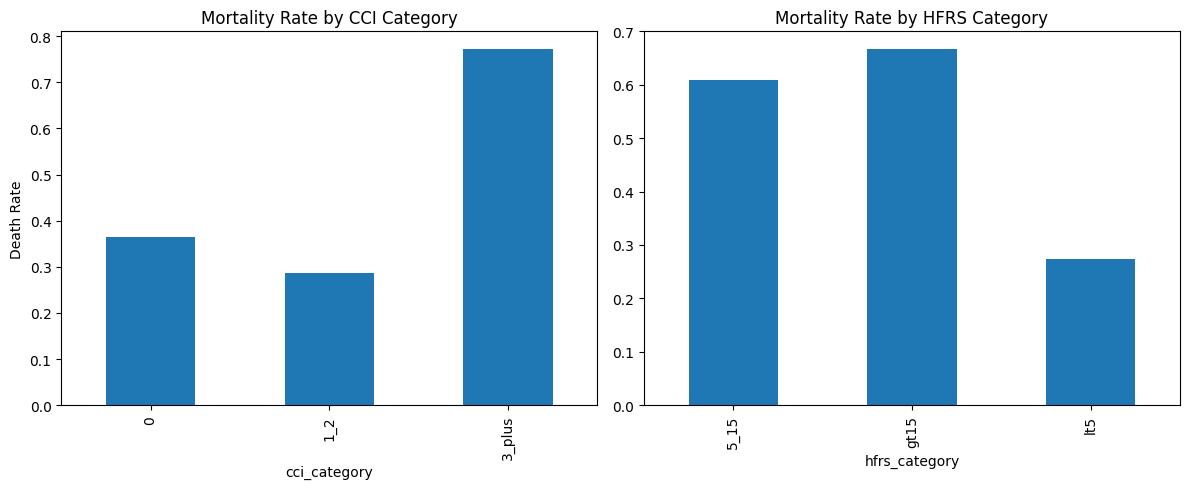

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
cci_mortality.plot(kind="bar")
plt.title("Mortality Rate by CCI Category")
plt.ylabel("Death Rate")

plt.subplot(1,2,2)
hfrs_mortality.plot(kind="bar")
plt.title("Mortality Rate by HFRS Category")

plt.tight_layout()
plt.show()


In [ ]:
cci_los = df.groupby("cci_category")["icu_los"].mean()
hfrs_los = df.groupby("hfrs_category")["icu_los"].mean()

print("CCI category ICU LOS:\n", cci_los)
print("\nHFRS category ICU LOS:\n", hfrs_los)


CCI category ICU LOS:
 cci_category
0         4.230879
1_2       3.884020
3_plus    4.887074
Name: icu_los, dtype: float64

HFRS category ICU LOS:
 hfrs_category
5_15    4.688257
gt15    8.233559
lt5     3.711245
Name: icu_los, dtype: float64


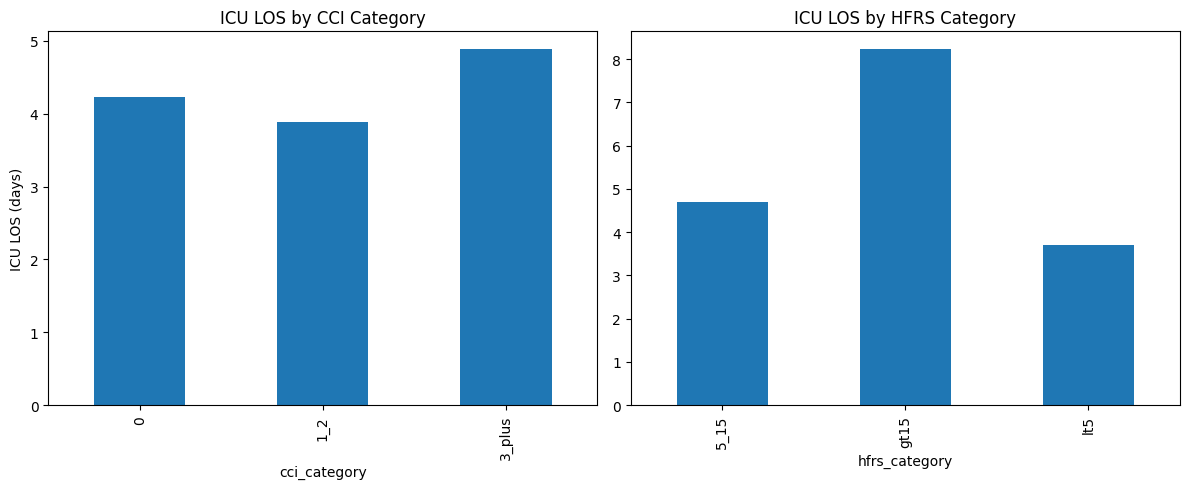

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
cci_los.plot(kind="bar")
plt.title("ICU LOS by CCI Category")
plt.ylabel("ICU LOS (days)")

plt.subplot(1,2,2)
hfrs_los.plot(kind="bar")
plt.title("ICU LOS by HFRS Category")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# ===== 1) CSV 로드 =====
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cohort_ver47_with_cci_hfrs.csv")

# ===== 2) 필요한 컬럼만 사용 =====
# death_flag, cci_score, hfrs_score, age 는 CSV에 존재함
logit_df = df[["death_flag", "cci_score", "hfrs_score", "age"]].dropna()

# ===== 3) X, y 설정 =====
X = logit_df[["cci_score", "hfrs_score", "age"]]
X = sm.add_constant(X)  # 절편 추가
y = logit_df["death_flag"]


In [ ]:
# ===== 4) Logit 모델 적합 =====
model = sm.Logit(y, X).fit()

# ===== 5) 결과 요약 출력 =====
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.560188
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             death_flag   No. Observations:                  836
Model:                          Logit   Df Residuals:                      832
Method:                           MLE   Df Model:                            3
Date:                Tue, 02 Dec 2025   Pseudo R-squ.:                  0.1390
Time:                        03:22:48   Log-Likelihood:                -468.32
converged:                       True   LL-Null:                       -543.94
Covariance Type:            nonrobust   LLR p-value:                 1.421e-32
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7243      0.447    -10.572      0.000      -5.600      -3.848
cci_score      0.2193      0.

In [ ]:
# ===== 6) OR(odds ratio) 계산 =====
odds_ratios = np.exp(model.params)
print("\n=== Odds Ratios (exp(coef)) ===")
print(odds_ratios)



=== Odds Ratios (exp(coef)) ===
const         0.008877
cci_score     1.245218
hfrs_score    1.077192
age           1.055314
dtype: float64


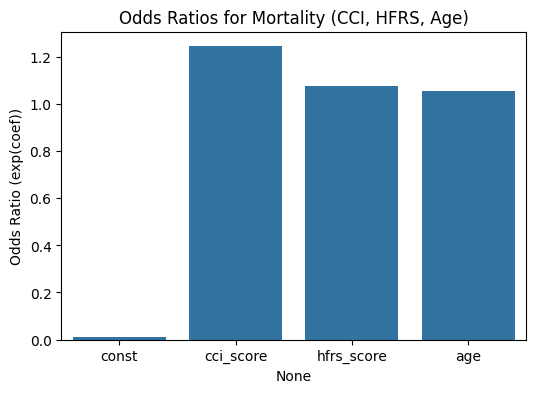

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=odds_ratios.index, y=odds_ratios.values)
plt.title("Odds Ratios for Mortality (CCI, HFRS, Age)")
plt.ylabel("Odds Ratio (exp(coef))")
plt.show()


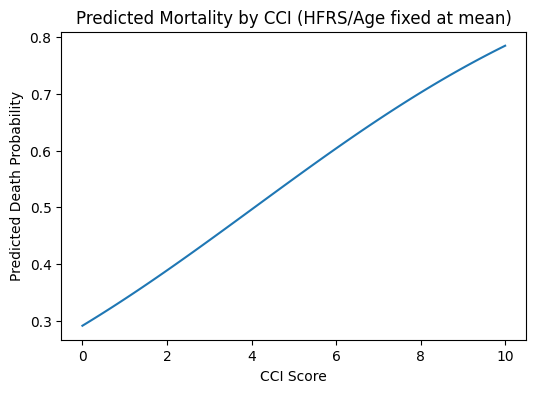

In [ ]:
from sklearn.linear_model import LogisticRegression

# ===== 7) sklearn 로지스틱 회귀로 예측 시각화 =====
clf = LogisticRegression()
clf.fit(logit_df[["cci_score", "hfrs_score", "age"]], y)

# 예: CCI vs predicted mortality
cci_range = np.linspace(logit_df["cci_score"].min(),
                        logit_df["cci_score"].max(), 100)
sample = pd.DataFrame({
    "cci_score": cci_range,
    "hfrs_score": logit_df["hfrs_score"].mean(),
    "age": logit_df["age"].mean()
})

pred_prob = clf.predict_proba(sample)[:,1]

plt.figure(figsize=(6,4))
plt.plot(cci_range, pred_prob)
plt.title("Predicted Mortality by CCI (HFRS/Age fixed at mean)")
plt.xlabel("CCI Score")
plt.ylabel("Predicted Death Probability")
plt.show()


In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/event_log_stemi_all.csv")
sorted(df['event_name'].unique())


['ANTI_PLT_ADMIN',
 'ANTI_PLT_ORDER',
 'DEATH',
 'DISCHARGE',
 'ECG_STEMI_FLAG',
 'ECG_TAKEN',
 'ED_ARRIVAL',
 'ED_DEPARTURE',
 'ICU_INTIME',
 'ICU_OUTTIME',
 'PCI_START',
 'TROP_POSITIVE',
 'TROP_TAKEN']